In [273]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [309]:
# IMPORT DES DONNEES
df = pd.read_excel('projet1_dataset.xlsx')

# Description des données

In [3]:
# AFFICHAGE DES INFOS GENERALES SUR LE FICHIER
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25114 entries, 0 to 25113
Data columns (total 9 columns):
NOM         25114 non-null object
SEXE        25114 non-null object
AGE         25114 non-null object
POIDS       25114 non-null float64
SQUAT       25114 non-null float64
BENCH       25114 non-null float64
DEADLIFT    25114 non-null float64
TOTAL       25114 non-null float64
SAISON      25114 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
# AFFICHAGE DES 5 PREMIERES LIGNES
df.head()

,NOM,SEXE,AGE,POIDS,SQUAT,BENCH,DEADLIFT,TOTAL,SAISON
0,Garcia Yves,M,SO,66.5,192.5,145.0,190.0,527.5,1978
1,Brulois Jean Pierre,M,SO,124.1,330.0,195.0,310.0,835.0,1981
2,Datteny Philippe,M,SO,100.0,275.0,172.5,270.0,717.5,1981
3,De Faria Lucien,M,M1,59.9,165.0,130.0,230.0,525.0,1981
4,Delohen Pierre,M,M2,73.4,200.0,135.0,255.0,590.0,1981


In [5]:
df.describe(include='all')

,NOM,SEXE,AGE,POIDS,SQUAT,BENCH,DEADLIFT,TOTAL,SAISON
count,25114,25114,25114,25114.000000,25114.000000,25114.000000,25114.000000,25114.000000,25114.000000
unique,5914,2,9,NaN,NaN,NaN,NaN,NaN,NaN
top,Baali Kader (BAALI Abdelkader),M,SO,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,20491,8666,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,75.886045,154.146150,104.513475,180.061579,438.533209,2010.649558
std,NaN,NaN,NaN,16.442822,56.403772,39.802416,53.672109,144.975155,7.193108
min,NaN,NaN,NaN,37.300000,22.500000,15.000000,30.000000,80.000000,1978.000000
25%,NaN,NaN,NaN,64.600000,110.000000,75.000000,140.000000,330.000000,2006.000000
50%,NaN,NaN,NaN,74.000000,150.000000,105.000000,180.000000,440.000000,2012.000000
75%,NaN,NaN,NaN,85.900000,190.000000,130.000000,220.000000,540.000000,2017.000000


In [275]:
# CREATION DES CATE DE POIDS POUR LES FEMMES
def ToWeightClassF(x):
    if x <= 43:
        return 43
    elif x <= 47:
        return 47
    elif x <= 52:
        return 52
    elif x <= 57:
        return 57
    elif x <= 63:
        return 63
    elif x <= 72:
        return 72
    elif x <= 84:
        return 84
    elif x > 84:
        return 85

In [276]:
# CREATION DES CATE DE POIDS POUR LES HOMMES
def ToWeightClassH(x):
    if x <= 53:
        return 53
    if x <= 59:
        return 59
    if x <= 66:
        return 66
    if x <= 74:
        return 74
    if x <= 83:
        return 83
    if x <= 93:
        return 93
    if x <= 105:
        return 105
    if x <= 120:
        return 120
    if x > 120:
        return 121

In [310]:
# Création de la variable CATE_POIDS
df['CATE_POIDS'] = df['POIDS'][df['SEXE'] == 'M'].apply(ToWeightClassH)
df['CATE_POIDS'][df['SEXE'] == 'M'] = df['POIDS'][df['SEXE'] == 'M'].apply(ToWeightClassH)
df['CATE_POIDS'][df['SEXE'] == 'F'] = df['POIDS'][df['SEXE'] == 'F'].apply(ToWeightClassF)

C:\Users\gwena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gwena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [311]:
# On filtre pour garder uniquement les athlètes qui ont fait au moins 3 saisons de compétitions

new = df.groupby(['NOM'])['SAISON'].unique()
new_at = pd.DataFrame(new.apply(lambda x: len(x)))
new_at['NOM'] = new_at.index
new_at = new_at.reset_index(drop=True)

In [312]:
new_df = pd.DataFrame(columns=['sexe', 'age', 'poids', 'cate_poids', '1_y', '2_y', 'target'])
new_df['name'] = new_at[new_at['SAISON'] >= 3]['NOM']
new_df = new_df.reset_index(drop=True)
new_df.head()

,sexe,age,poids,cate_poids,1_y,2_y,target,name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABDELOUHABI Mohamed Ali
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABDOULJARINOV Zaour (ABDOULMEJIDOV Zaour ABDOU...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABECASSIS Stephane
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABI Samir
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFONSO Georges


In [313]:
param_a_predire = 'DEADLIFT'

# Pour chaque ligne du nouveau dataframe (chaque ligne est un athlète)

for i in range(len(new_df)):
        
    current_name = new_df.loc[i, 'name']
    res = df[df['NOM'] == current_name].groupby('SAISON')[param_a_predire].max()
    
    #print(f'Working on {current_name}')
    data_by_name = df[df['NOM'] == current_name]
    
    # On récupère les 2 premières perfs (meilleure perf pour les 2 premières saisons)
    new_df.loc[i, '1_y'] = res.iloc[0]
    new_df.loc[i, '2_y'] = res.iloc[1]
    #new_df.loc[i, '3_y'] = res.iloc[2]
    
    # On récupère la 3ème perf, qui sera la valeur à prédire
    new_df.loc[i, 'target'] = res.iloc[2]
    
    # On utilise les informations de la ligne 2 (equivalente à la perf de third_y) pr récupérer l'age et sexe
    new_df.loc[i, 'sexe'] = data_by_name.iloc[2, 1]
    new_df.loc[i, 'age'] = data_by_name.iloc[2, 2]
    new_df.loc[i, 'poids'] = data_by_name.iloc[2, 3]
    new_df.loc[i, 'cate_poids'] = data_by_name.iloc[2, 9]

In [137]:
new_df.head()

,sexe,age,poids,cate_poids,1_y,2_y,target,name
0,M,SO,121.1,121,635,675,670,ABDELOUHABI Mohamed Ali
1,M,SO,92.8,93,577.5,585,615,ABDOULJARINOV Zaour (ABDOULMEJIDOV Zaour ABDOU...
2,M,SO,79.2,83,430,485,480,ABECASSIS Stephane
3,M,ES,83.5,93,500,535,575,ABI Samir
4,M,JU,95.8,105,330,407.5,585,AFONSO Georges


In [147]:
# on vérifie s'il y a des nulls
for col in new_df.columns:
    print(col, new_df[col].isnull().sum())

sexe 0
age 0
poids 0
cate_poids 0
1_y 0
2_y 0
target 0
name 0


In [281]:
y = new_df.iloc[:, 6].values

In [282]:
col_numeric = ['poids', '1_y', '2_y']

# One Hot encoder = converting categorical variables
OHE_sexe = pd.get_dummies(new_df['sexe'], drop_first=True, prefix='sexe')
OHE_age = pd.get_dummies(new_df['age'], drop_first=True, prefix='age')
OHE_cate_poids = pd.get_dummies(new_df['cate_poids'], drop_first=True, prefix='catepoids')

In [283]:
# CONCATENATION DES DONNEES TRANSFORMEES
X = pd.concat([new_df[col_numeric], OHE_sexe, OHE_age, OHE_cate_poids], axis=1)
X.head()

,poids,1_y,2_y,sexe_M,age_ES,age_JU,age_M1,age_M2,age_M3,age_M4,...,catepoids_66.0,catepoids_72.0,catepoids_74.0,catepoids_83.0,catepoids_84.0,catepoids_85.0,catepoids_93.0,catepoids_105.0,catepoids_120.0,catepoids_121.0
0,121.1,225,230,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,92.8,220,220,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,79.2,135,145,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,83.5,160,185,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,95.8,105,130,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [284]:
# CREATION DU JEU TEST ET DU JEU TRAIN

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1161, 27), (387, 27), (1161,), (387,))

In [285]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Calcul std et mean puis normalisation des données
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [286]:
# regression linéaire multiple

from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [287]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = regression.predict(X_test)
mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)

(371.80331013027904, 13.039030433512998, 0.8719311153089895)

In [117]:
# coefficients de regression

regression.coef_

array([ 9.26643723e-01,  5.84184714e+00,  3.85782158e+01, -9.76911697e+12,
       -2.06197500e+00, -1.44107605e+00, -5.40855024e+00, -3.87008735e+00,
       -3.74802431e+00, -2.05186651e+00, -3.61135387e+00, -1.51528430e-01,
       -5.27366087e-01,  3.48266350e+12, -1.06761208e-01,  4.59021955e+12,
       -3.74256452e-01,  7.71518237e+12, -2.68327253e-01,  9.84835092e+12,
        1.11104756e+13, -7.12402982e-01, -1.95982223e-01,  9.43695100e+12,
        7.02363648e+12,  5.09760042e+12,  1.87376904e+12])

In [47]:
# coefficient b

regression.intercept_

482.3824289405685

In [48]:
X.columns

Index(['poids', '1_y', '2_y', 'sexe_M', 'age_ES', 'age_JU', 'age_M1', 'age_M2',
       'age_M3', 'age_M4', 'age_SO', 'catepoids_47.0', 'catepoids_52.0',
       'catepoids_53.0', 'catepoids_57.0', 'catepoids_59.0', 'catepoids_63.0',
       'catepoids_66.0', 'catepoids_72.0', 'catepoids_74.0', 'catepoids_83.0',
       'catepoids_84.0', 'catepoids_85.0', 'catepoids_93.0', 'catepoids_105.0',
       'catepoids_120.0', 'catepoids_121.0'],
      dtype='object')

In [288]:
# RFE = RECURSIVE FEATURE ELIMINATION
from sklearn.feature_selection import RFE

selector = RFE(estimator=regression, n_features_to_select=1)
selector.fit(X_test, y_test)

# On récupère l'ordre des colonnes (de la meilleure à la pire) 
ordre_col = np.argsort(selector.ranking_)
ordre_col

array([ 2,  5,  3,  6,  1,  7, 24,  0, 15, 25, 26, 23, 20,  8, 10,  9, 14,
       12, 18, 16, 11, 21,  4, 13, 17, 19, 22], dtype=int64)

0.8731379449327675 20


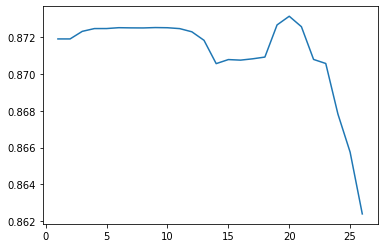

In [289]:
ordre_col = np.argsort(selector.ranking_)

#Graphique de la performance par colonne pour trouver quel sera le meilleur modèle en fonction du nombre de colonnes
# prises en compte
#[] = creer tableau vide
scores = []
features_num = []
best_indice = 0

best_score = 0
#Boucle pour faire toutes les regressions en enlevant les colonnes une par une
for i in range(1, len(selector.ranking_)):
    X_opt = X_train[:, ordre_col][:, :-i]
    X_test_opt = X_test[:, ordre_col][:, :-i]
    regression = LinearRegression()
    regression.fit(X_opt, y_train)
    # Calculer pour chaque modèle le y_pred et la performance
    # puis stocker dans le tableau score (avec append) et stocker le nombre de colonnes testées dans features_num
    y_pred = regression.predict(X_test_opt)
    current = r2_score(y_test, y_pred)
    scores.append(current)
    features_num.append(i)
    #Pour savoir quelle sera la meilleure performance avec combien de colonne
    #(trop de colonne pour le faire visuellement)
    if current > best_score:
        best_score = current
        best_indice = i
#Graphique de la performance en fonction du nombre de colonne
#(nb : les colonnes sont ordonnées en fonction de leur poids)
plt.plot(features_num, scores)
#best_score : le meilleur r2 obtenu, best_indice : le nombre de colonne pour avoir ce r2
print(best_score, best_indice)

In [290]:
# Numéro des meilleures colonnes : on enlève X features en fonction du résultat précédant
ordre_col[:-20]

array([ 2,  5,  3,  6,  1,  7, 24], dtype=int64)

In [291]:
# On réentraine avec nos meilleures features
X_opt = X_train[:, ordre_col[:-20]]
X_test_opt = X_test[:, ordre_col[:-20]]

regression.fit(X_opt, y_train)
y_pred = regression.predict(X_test_opt)
y_pred = regression.predict(X_test_opt)

mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)

(368.29970150616623, 13.025527145538444, 0.8731379449327675)

In [292]:
# On récupère les coefs et les noms de colonnes dans le bon ordre
coef = regression.coef_[:]
cols = X.iloc[:, ordre_col[:-20]].columns
coef, cols

(array([44.51538041,  1.24848277,  2.23500002, -3.62153909,  2.58527952,
        -2.18571891,  0.47190646]),
 Index(['2_y', 'age_JU', 'sexe_M', 'age_M1', '1_y', 'age_M2',
        'catepoids_105.0'],
       dtype='object'))

In [124]:
# On exporte en .csv
export_coef = pd.DataFrame()
export_coef['coef'] = coef
export_coef['cols'] = cols
export_coef.to_csv('export_coef_deadlift.csv')
export_coef

,coef,cols
0,39.043154,2_y
1,5.127528,1_y
2,3.537071,sexe_M
3,-3.738686,age_M1
4,-2.646648,age_M2
5,-1.355716,age_SO
6,-2.854334,age_M3


In [293]:
# Test d'application du modèle sur de vrais athlètes ayant fait uniquement 2 saisons

# IMPORT DES DONNEES
df = pd.read_excel('projet1_dataset.xlsx')
# Création de la variable CATE_POIDS
df['CATE_POIDS'] = df['POIDS'][df['SEXE'] == 'M'].apply(ToWeightClassH)
df['CATE_POIDS'][df['SEXE'] == 'M'] = df['POIDS'][df['SEXE'] == 'M'].apply(ToWeightClassH)
df['CATE_POIDS'][df['SEXE'] == 'F'] = df['POIDS'][df['SEXE'] == 'F'].apply(ToWeightClassF)
# On filtre pour garder uniquement les athlètes qui ont fait exactement 2 saisons de compétitions

new2 = df.groupby(['NOM'])['SAISON'].unique()
new_at2 = pd.DataFrame(new2.apply(lambda x: len(x)))
new_at2['NOM'] = new_at2.index
new_at2 = new_at2.reset_index(drop=True)
new_df2 = pd.DataFrame(columns=['sexe', 'age', 'poids', 'cate_poids', '1_y', '2_y'])
new_df2['name'] = new_at2[new_at2['SAISON'] == 2]['NOM']
new_df2 = new_df2.reset_index(drop=True)
new_df2.head()


C:\Users\gwena\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\gwena\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sexe,age,poids,cate_poids,1_y,2_y,name
0,NaN,NaN,NaN,NaN,NaN,NaN,ABDELKADER Yohan
1,NaN,NaN,NaN,NaN,NaN,NaN,ADJA BRAHIM
2,NaN,NaN,NaN,NaN,NaN,NaN,AINS Charlotte
3,NaN,NaN,NaN,NaN,NaN,NaN,AINS Jessica
4,NaN,NaN,NaN,NaN,NaN,NaN,AIRAUD QUENTIN


In [294]:
param_a_predire = 'SQUAT'

# Pour chaque ligne du nouveau dataframe (chaque ligne est un athlète)

for i in range(len(new_df2)):
        
    current_name2 = new_df2.loc[i, 'name']
    res2 = df[df['NOM'] == current_name2].groupby('SAISON')[param_a_predire].max()
    
    #print(f'Working on {current_name}')
    data_by_name2 = df[df['NOM'] == current_name2]
    
    # On récupère les 2 premières perfs (meilleure perf pour les 2 premières saisons)
    new_df2.loc[i, '1_y'] = res2.iloc[0]
    new_df2.loc[i, '2_y'] = res2.iloc[1]
    
    # On utilise les informations de la ligne 1 (equivalente à la perf de 2_y) pr récupérer l'age et sexe
    new_df2.loc[i, 'sexe'] = data_by_name2.iloc[1, 1]
    new_df2.loc[i, 'age'] = data_by_name2.iloc[1, 2]
    new_df2.loc[i, 'poids'] = data_by_name2.iloc[1, 3]
    new_df2.loc[i, 'cate_poids'] = data_by_name2.iloc[1, 9]

In [192]:
new_df2.head()

,sexe,age,poids,cate_poids,1_y,2_y,name
0,M,SO,117.1,120,457.5,585,ABDELKADER Yohan
1,M,SO,82.89,83,445,495,ADJA BRAHIM
2,F,JU,71.7,72,210,212.5,AINS Charlotte
3,F,SO,50.5,52,217.5,257.5,AINS Jessica
4,M,ES,59.58,66,312.5,347.5,AIRAUD QUENTIN


In [295]:
# One Hot encoder = converting categorical variables
OHE_sexe = pd.get_dummies(new_df2['sexe'], drop_first=True, prefix='sexe')
OHE_age = pd.get_dummies(new_df2['age'], drop_first=True, prefix='age')
OHE_cate_poids = pd.get_dummies(new_df2['cate_poids'], drop_first=True, prefix='catepoids')
# CONCATENATION DES DONNEES TRANSFORMEES
X2 = pd.concat([new_df2[col_numeric], OHE_sexe, OHE_age, OHE_cate_poids], axis=1)
X2.head()

,poids,1_y,2_y,sexe_M,age_ES,age_JU,age_M1,age_M2,age_M3,age_M4,...,catepoids_66.0,catepoids_72.0,catepoids_74.0,catepoids_83.0,catepoids_84.0,catepoids_85.0,catepoids_93.0,catepoids_105.0,catepoids_120.0,catepoids_121.0
0,117.1,150,190,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82.89,150,172.5,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,71.7,65,70,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,50.5,82.5,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59.58,112.5,125,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [296]:
X2 = scaler.transform(X2)
X2 = X2[:, ordre_col][:, :-20]
y_pred2 = regression.predict(X2)
df_export = pd.DataFrame()
df_export['NOM'] = new_df2['name']
df_export['target'] = y_pred2
df_export.to_excel('result_squat.xls', index=False)